## Алиев Азнаур, Б01-909


# Гиперболические уравнения:
Уравнения переноса: \
\
Ut + a*Ux = 0 \
U(t = 0) = phi(x) \
U(x = 0) = mu(t) \

a = 1  

# Начальные условия: 
U(t = 0) = sin(x) \
U(x = 0) = -sin(t) \

# Решение: 
U = sin(x - t) 
# Схема Лакса-Вендрофа

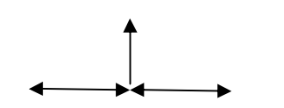



# Разностная схема

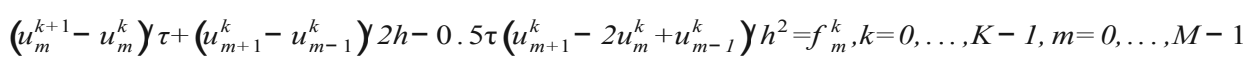

In [177]:
import math
import random
import scipy.optimize
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from scipy.optimize import least_squares
from matplotlib.pyplot import cm
from matplotlib import cm
from matplotlib.ticker import LinearLocator



In [178]:
def phi1(x):
    return math.sin(x)

def mu1(t):
    return -math.sin(t)


In [179]:
def solve_lw(phi, mu, a, h, tau, N, M):
    u = ([([0 for i in range(M)]) for j in range(N)])
    
    for i in range(N):
        u[i][0] = phi(i*h)
        
    for j in range(M):
        u[0][j] = mu(j * tau)
    
    k = tau * a / h
    for j in range (0, M-1):
        for i in range (1, N-1):
            u[i][j+1] = u[i-1][j] * k * (1+k) / 2 + u[i][j] * (1-k**2) - k/2 * (1-k)*u[i+1][j]
            
    return np.array([np.array([u[j][i] for i in range(M)]) for j in range(N)])

In [180]:
def max_error(meth, phi, mu, a, h, tau, N, M, trueSol):
    u =  meth(phi, mu, a, h, tau, N, M)

    def_err = 0 
    
    for i in range(N):
        for j in range(M):
            if i + j >= N:
                continue
            
            x = h * i
            t = j * tau
            
            err = abs(trueSol(x, t) - u[i][j])
            def_err = max(def_err, err)
            
    return def_err

    
def Error(phi, mu, a, hs, N, M, trueSol):

    err3 = []
    
    for h in hs:
        err3.append(max_error(solve_lw, phi, mu, a, h, h, N, M, trueSol))
    
    fig = plt.figure(figsize=(15, 10), dpi=80)

    hs_ = [np.log(h) for h in hs]
 
    err3_ = [np.log(err) for err in err3]

    plt.ylim(-35, 0)

    plt.grid()
    plt.plot(hs, err3_, label = 'lw')
    plt.xlabel("log(h)", fontsize=12)
    plt.ylabel("log(Error)", fontsize=12)
    
    
    plt.legend()
    plt.show()

def draw(meth, phi, mu, a, h, tau, N, M):
    # Lax-Wendroff scheme
    u = meth(phi, mu, 1, h, tau, N, M)    

    xs = np.array([i * h for i in range(N)])
    ts = np.array([i * tau for i in range(M)])


    fig = plt.figure(figsize=(20, 20), dpi=80)
    ax = fig.add_subplot(projection='3d')
    
    X, Y = np.meshgrid(ts, xs)
    
    surf = ax.plot_surface(Y, X, u)
    

    ax.plot([0 for i in range(M)], xs, [phi(xs[i]) for i in range(len(xs))], lw=0.5)
    ax.plot(ts, [0 for i in range(N)], [mu(ts[i]) for i in range(len(ts))], lw=0.5)
    
  
    ax.set_xlabel("X", fontsize=12)
    ax.set_ylabel("Y", fontsize=12)
    ax.set_zlabel("$u(x, t)$", fontsize=12)
    ax.view_init(30, 70)
    plt.show()

def draw_groundtruth(meth, phi, mu, a, h, tau, N, M, trueSol):
    # Groundtruth function
    
    xs = np.array([i * h for i in range(N)])
    ts = np.array([i * tau for i in range(M)]) 
    uTrue = np.array([np.array([trueSol(h * j, tau * i) for i in range(M)]) for j in range(N)])
    
    fig = plt.figure(figsize=(20, 20), dpi=80)
    ax = fig.add_subplot(projection='3d')
    

    X, Y = np.meshgrid(ts, xs)
    
    surfTrue = ax.plot_surface(Y, X, uTrue, color='red')
    

    ax.plot([0 for i in range(M)], xs, [phi(xs[i]) for i in range(len(xs))], lw=0.5)
    ax.plot(ts, [0 for i in range(N)], [mu(ts[i]) for i in range(len(ts))], lw=0.5)
    
  
    ax.set_xlabel("X", fontsize=12)
    ax.set_ylabel("Y", fontsize=12)
    ax.set_zlabel("$u(x, t)$", fontsize=12)
    ax.view_init(30, 70)
    plt.show()

    

def trueSol1(x, t):
    return math.sin(x - t)



h = 0.09
tau = 0.09
N = 250
M = 250


# Решение по разностной схеме:


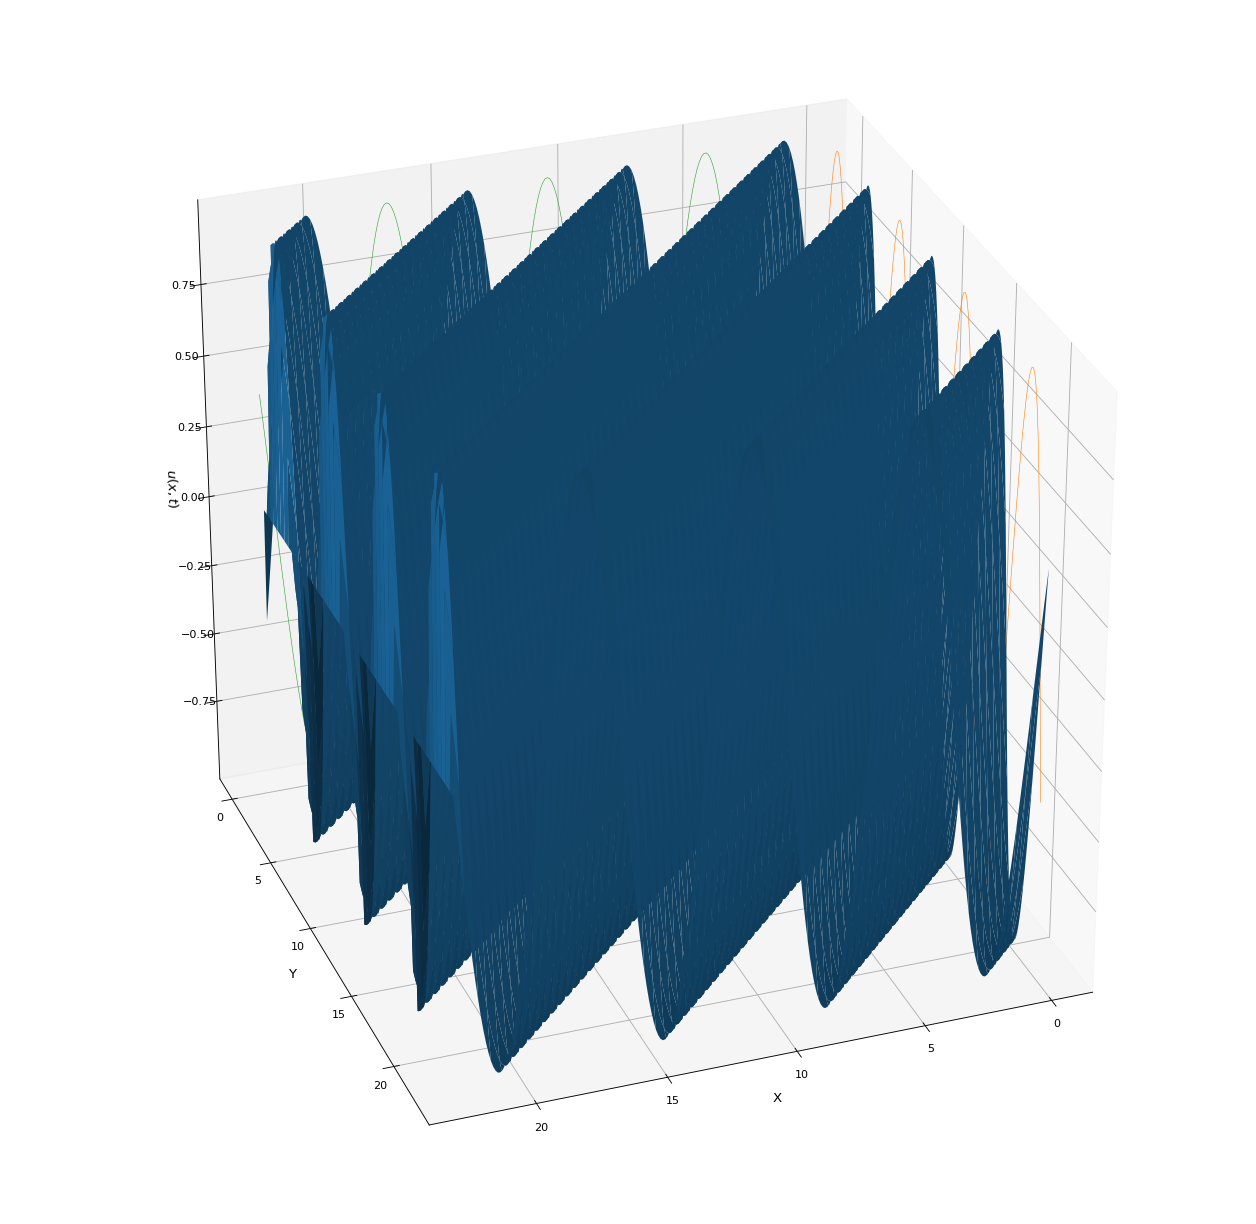

In [181]:
draw(solve_lw, phi1, mu1, 1, h, tau, N, M)


# Аналитическое решение:


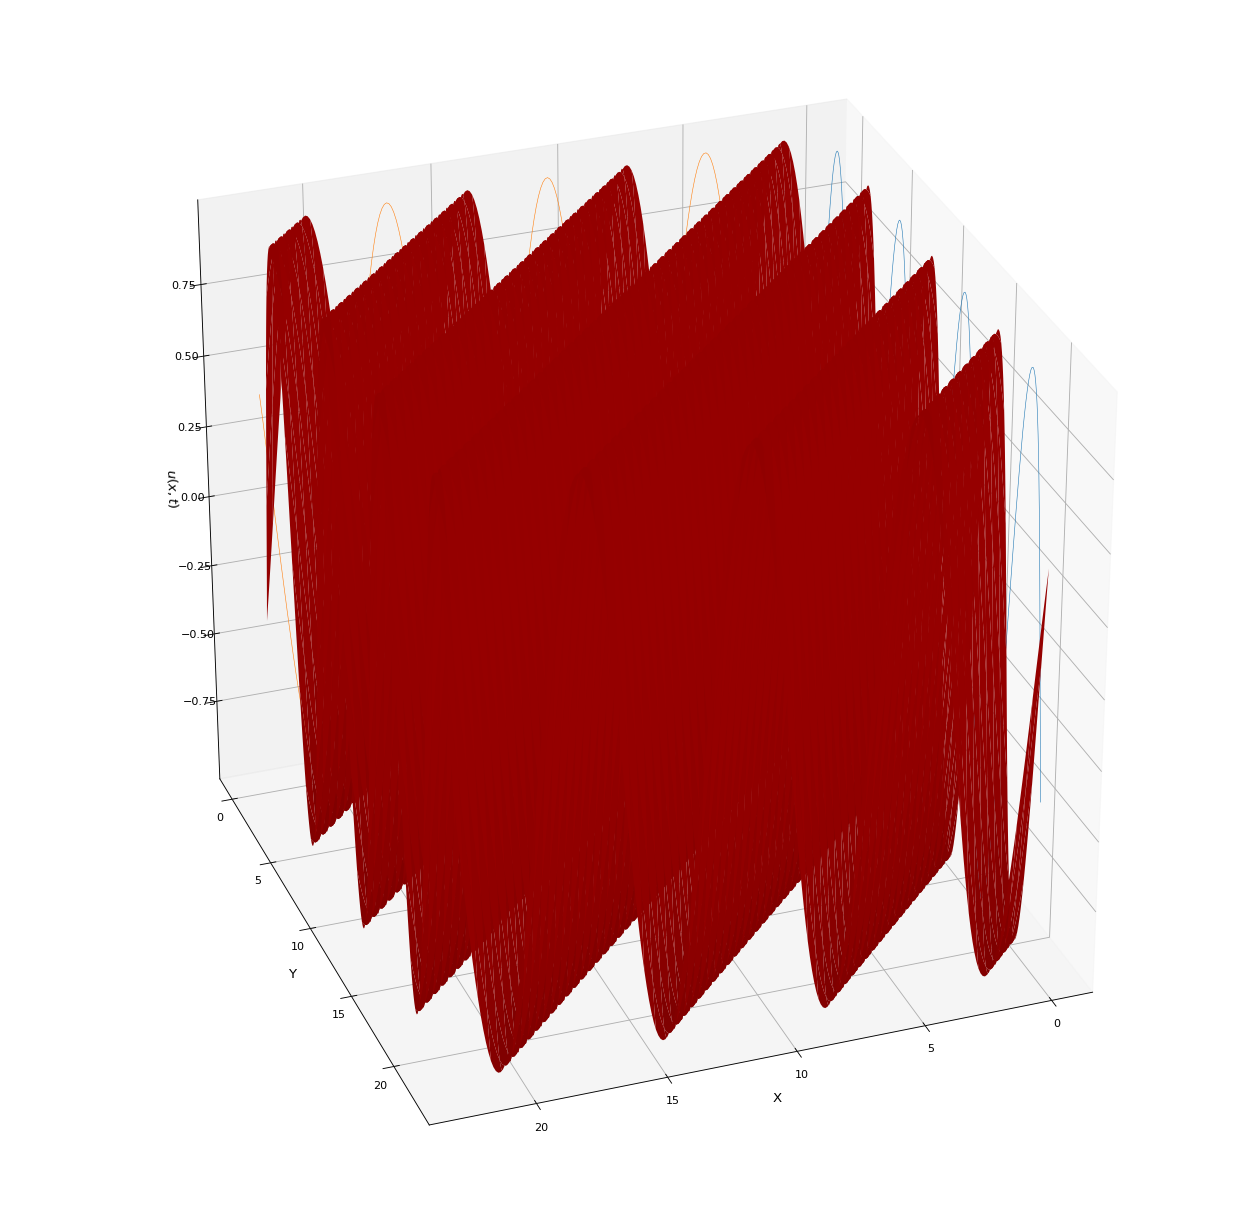

In [182]:
draw_groundtruth(solve_lw, phi1, mu1, 1, h, tau, N, M, trueSol1)


# Погрешность:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


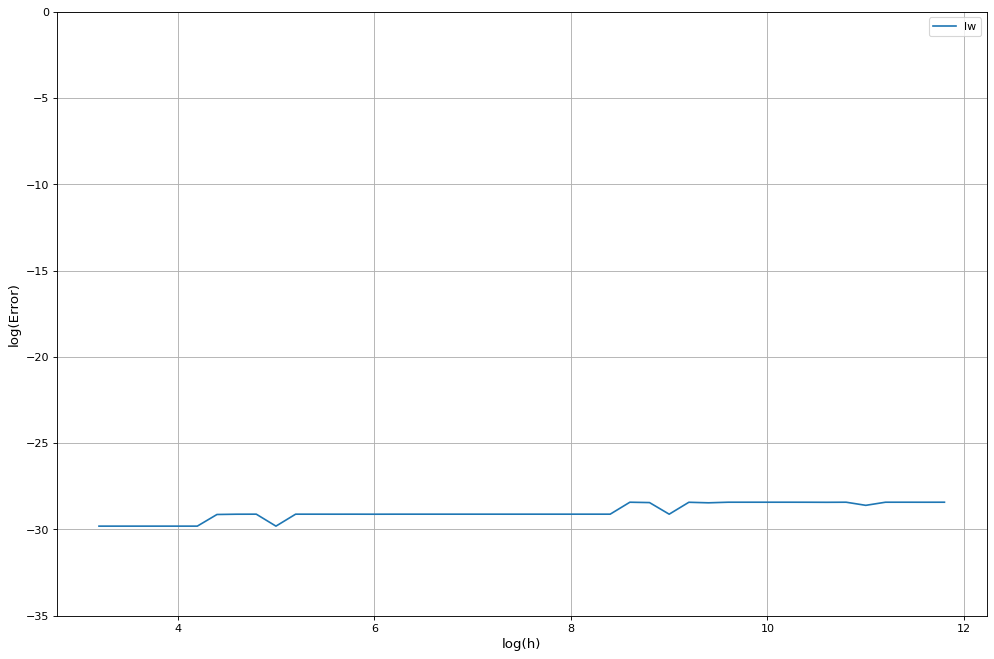

In [183]:
Error(phi1, mu1, 1, np.arange(3.0, 12.0, 0.2), N, M, trueSol1)